<a href="https://colab.research.google.com/github/piyush1856/time-series-and-recommendation-system/blob/main/02_Time_Series_Analysis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# LECTURE 02.TimeSeriesAnalysis-1




### Timeseries Decomposition

In [ ]:
import statsmodels.api as sm

In [ ]:
model = sm.tsa.seasonal_decompose(mobile_sales.Sales, model="additive")

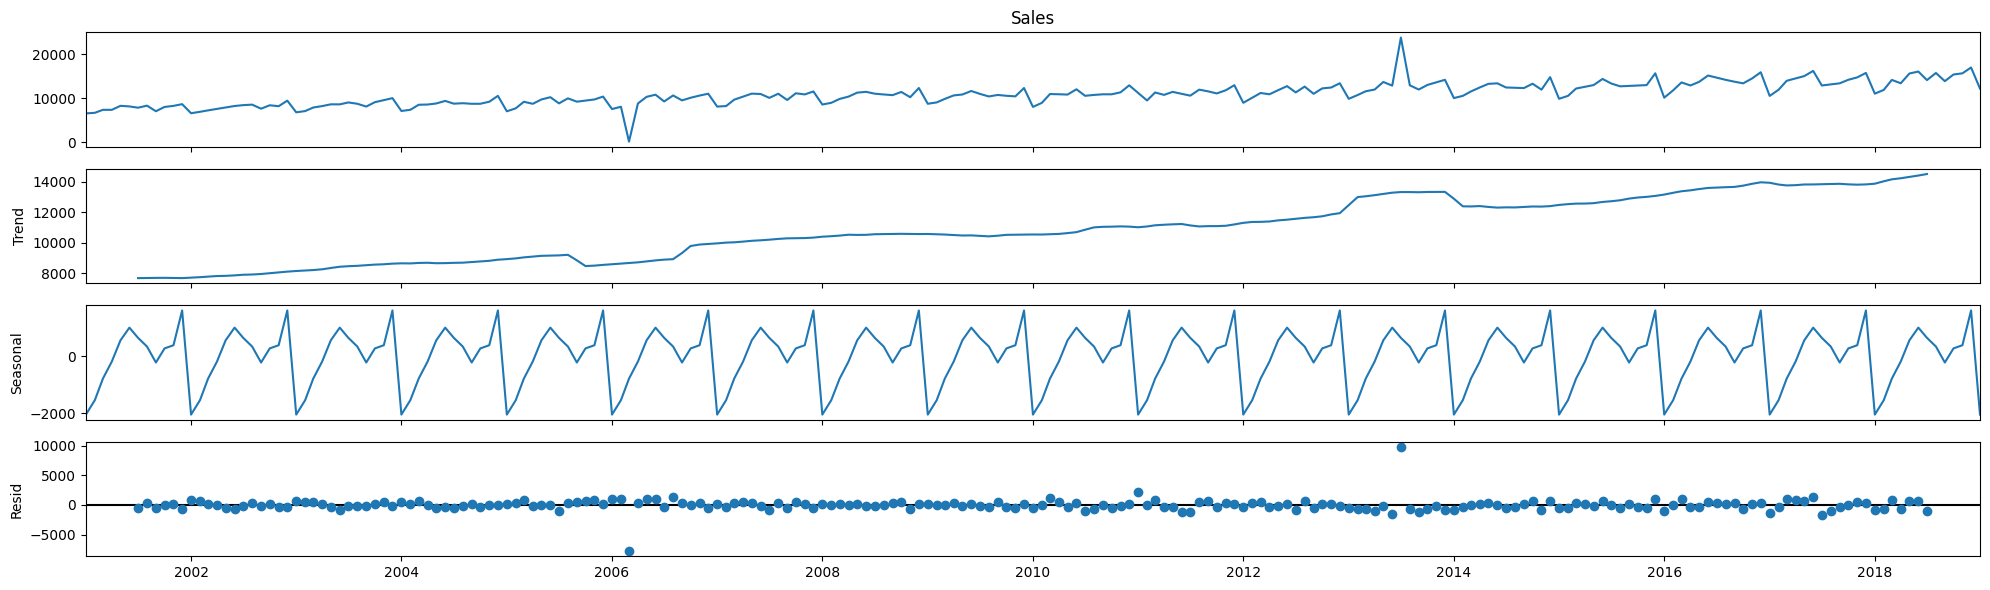

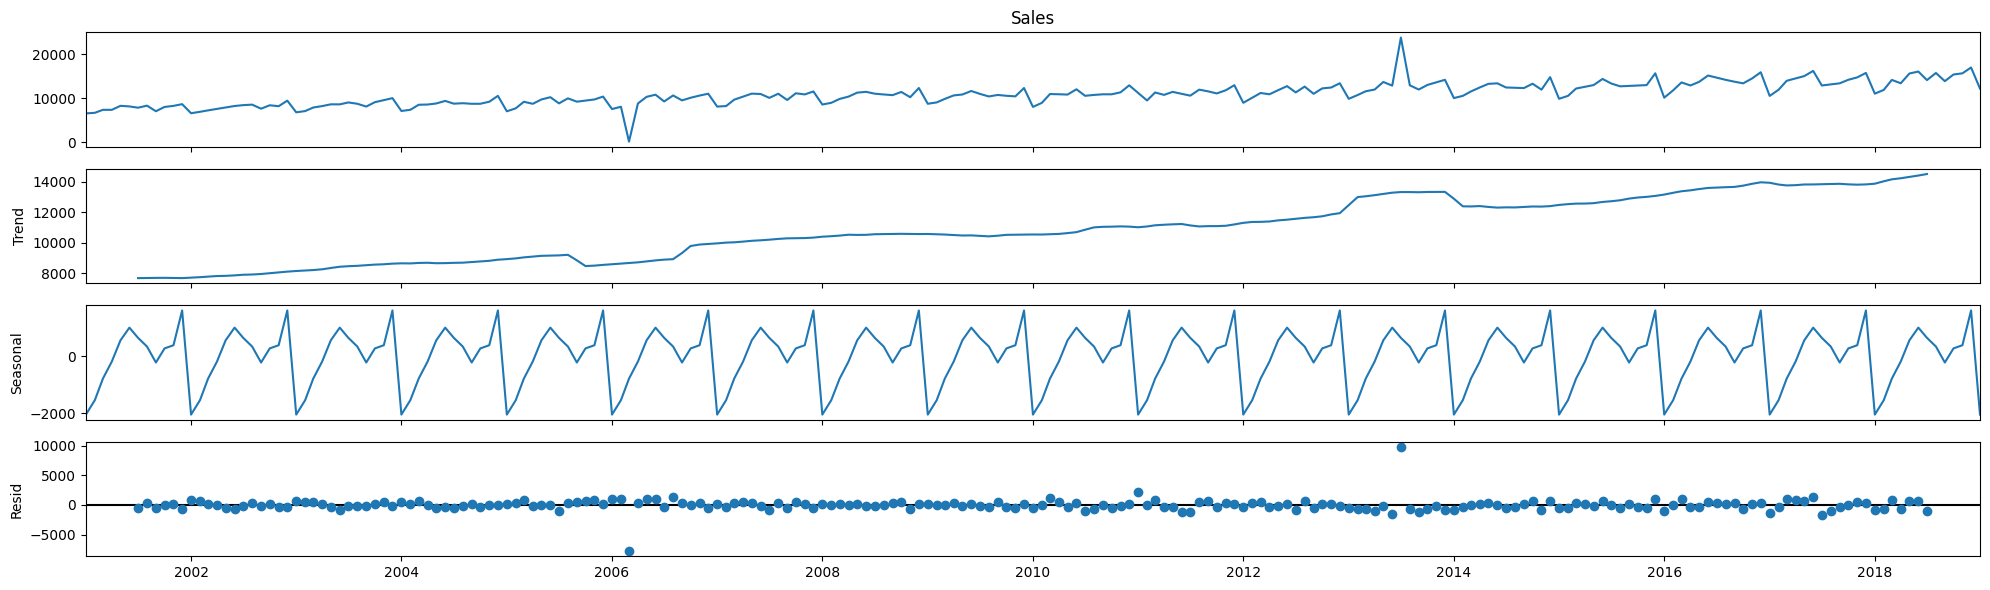

In [ ]:
model.plot()

<Axes: xlabel='DATE'>

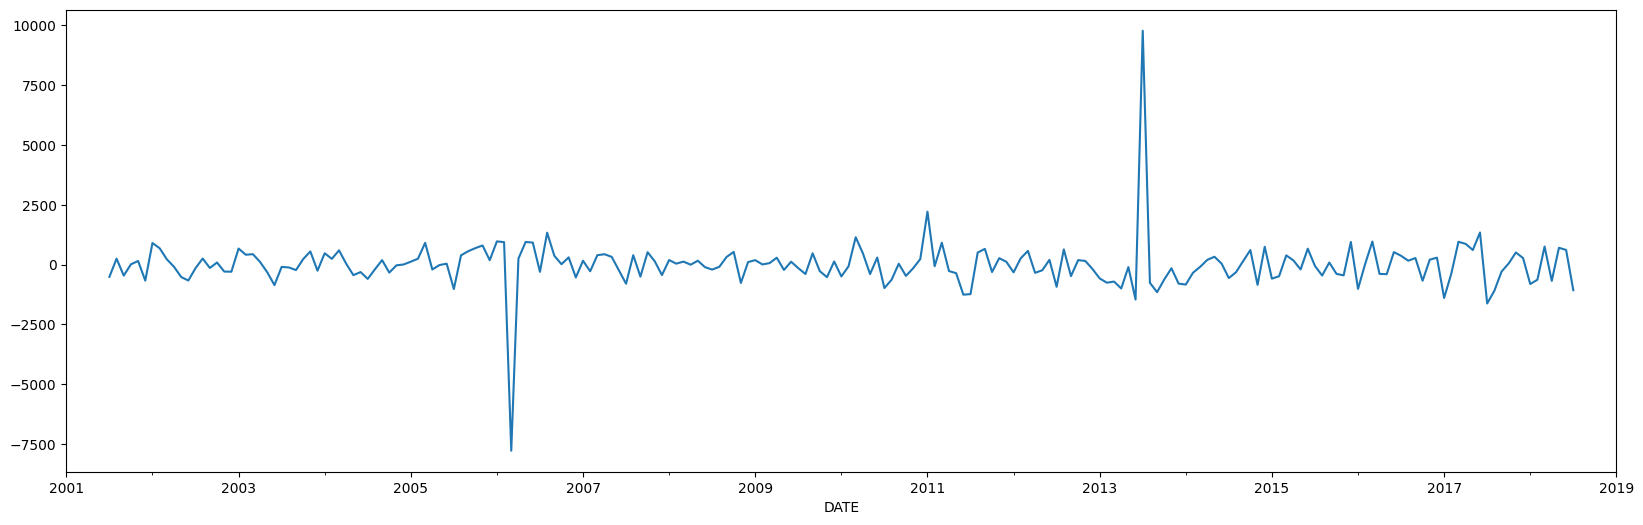

In [ ]:
model.resid.plot()

<Axes: >

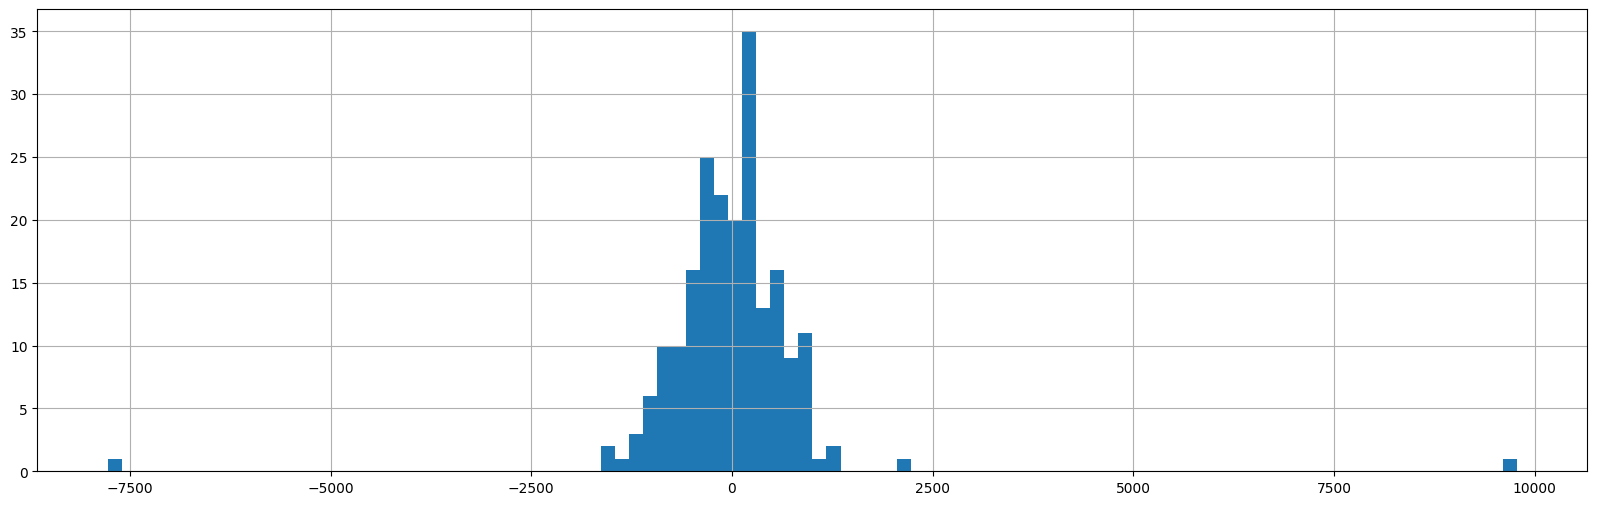

In [ ]:
model.resid.hist(bins=100)


In [ ]:
model.resid.mean()

-5.492136437908002

### Train-Test Split

In [ ]:
train_max_date = mobile_sales.index[-12]
train_x = mobile_sales.loc[mobile_sales.index < mobile_sales.index[-12]].copy()
test_x = mobile_sales.loc[mobile_sales.index >= mobile_sales.index[-12]].copy()

test_x


,Sales
DATE,
2018-02-01,11852.0
2018-03-01,14123.0
2018-04-01,13360.0
2018-05-01,15576.0
2018-06-01,16021.0
2018-07-01,14080.0
2018-08-01,15697.0
2018-09-01,13838.0
2018-10-01,15351.0


### Evaluation Metric

In [ ]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape
)

# Creating a function to print values of all these metrics.
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3))
    print('MAPE:', round(mape(actual, predicted), 3))

### Forcasting the Mean

In [ ]:
train_x["Sales"].mean()

10657.741463414633

MAE : 3893.425
RMSE : 4175.798
MAPE: 0.259


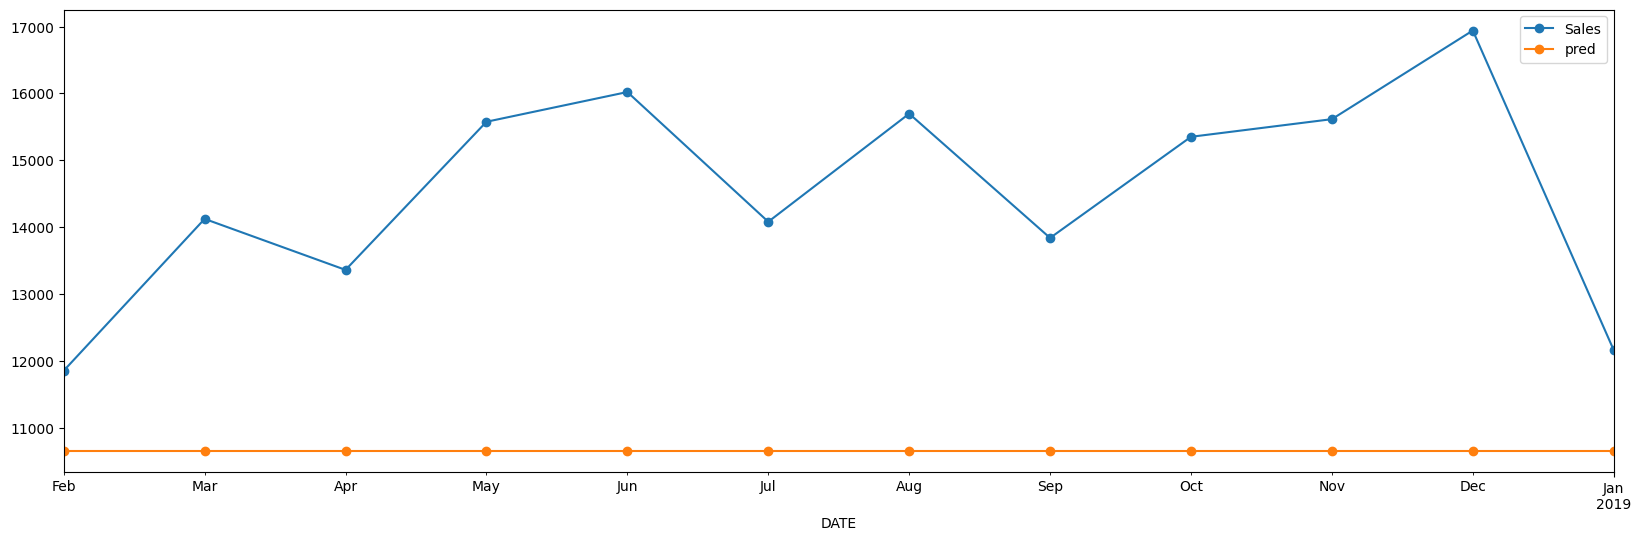

In [ ]:
test_x['pred'] = train_x['Sales'].mean()

test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])


### Naive Method

In [ ]:
train_x['Sales'][-1]

<ipython-input-107-ebc7c2383a70>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train_x['Sales'][-1]


11005.0

<ipython-input-108-e0d468582818>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test_x['pred'] = train_x['Sales'][-1]


MAE : 3546.167
RMSE : 3854.067
MAPE: 0.235


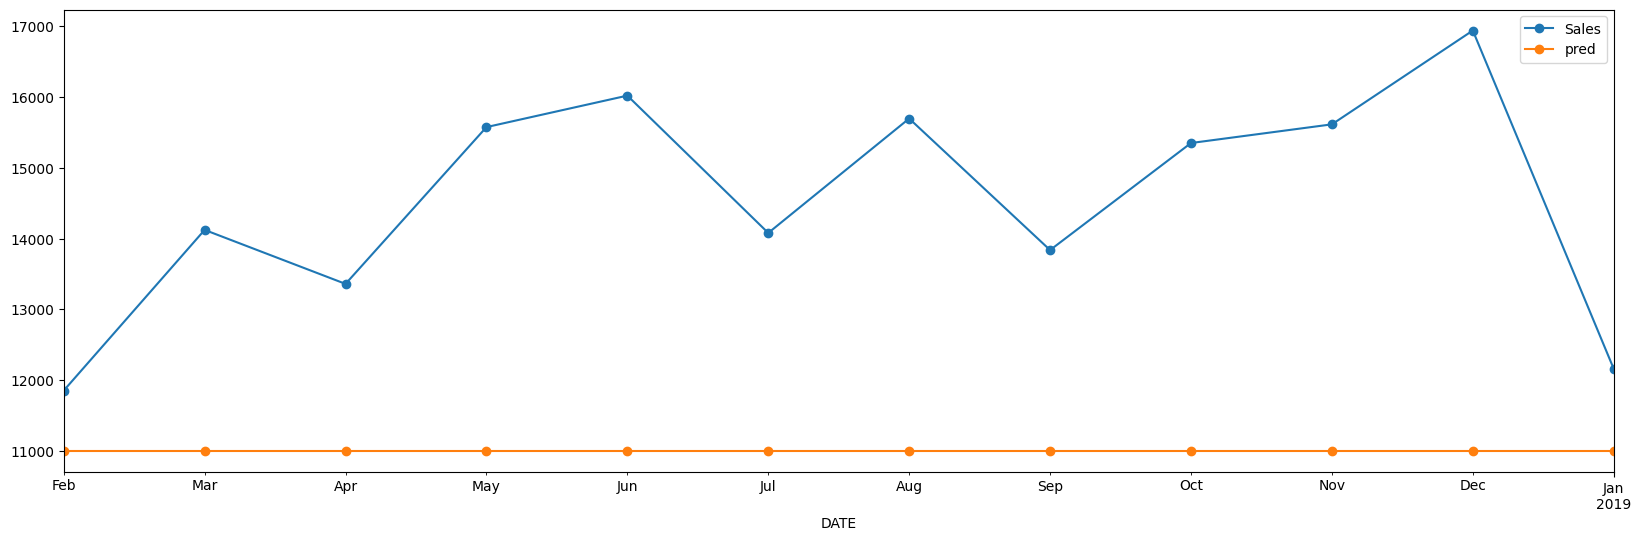

In [ ]:
test_x['pred'] = train_x['Sales'][-1]

test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])

### Seasonal Naive

<ipython-input-109-9b5d194230fe>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  test_x.loc[i]['pred'] = train_x.loc[i - pd.DateOffset(years=1)]['Sales']


MAE : 907.417
RMSE : 1126.351
MAPE: 0.062


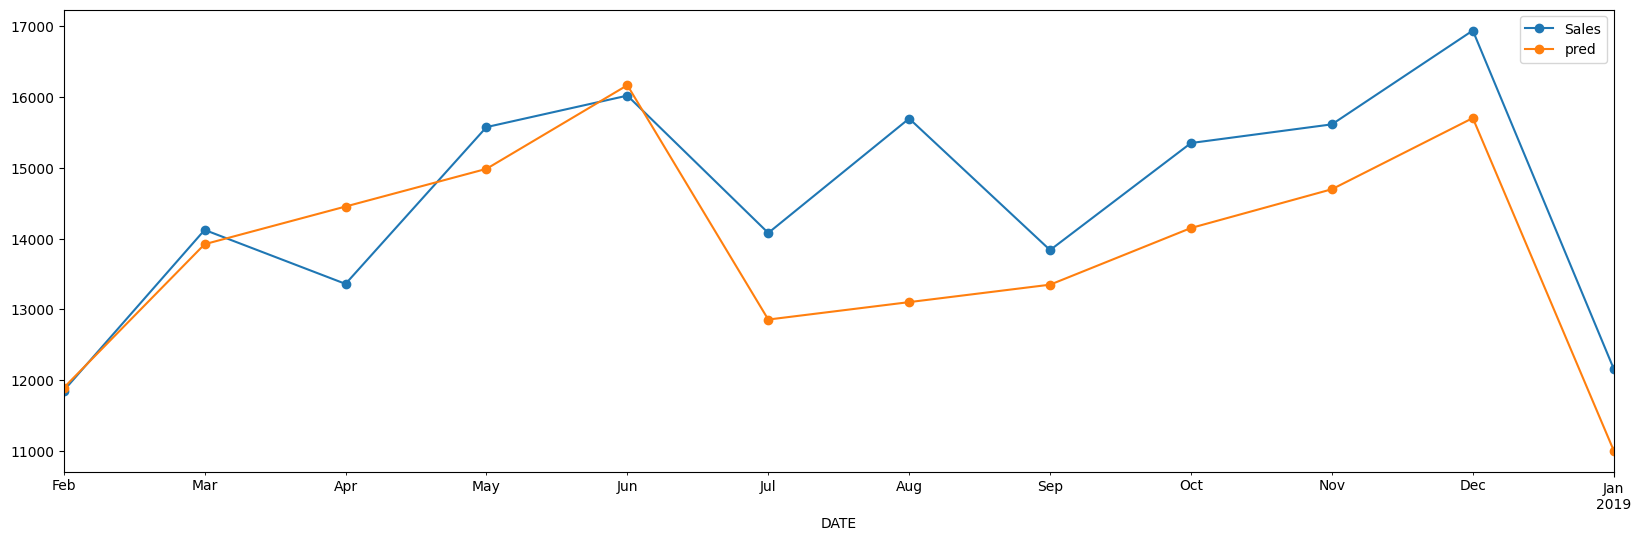

In [ ]:
test_x = test_x.copy()
for i in test_x.index:
  test_x.loc[i]['pred'] = train_x.loc[i - pd.DateOffset(years=1)]['Sales']

test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])

### Drift Method

<ipython-input-110-c6825c577014>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_t = train_x['Sales'][-1]
<ipython-input-110-c6825c577014>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  m = (y_t - train_x['Sales'][0]) / len(train_x)


MAE : 3425.811
RMSE : 3735.003
MAPE: 0.227


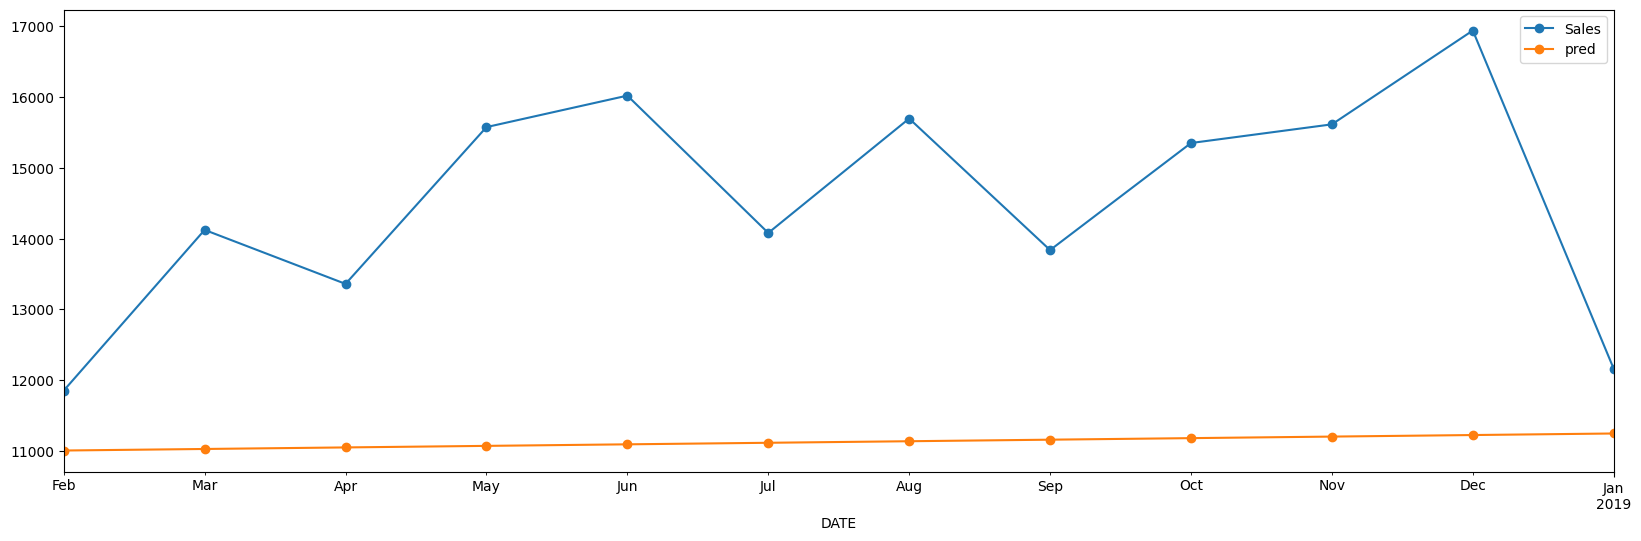

In [ ]:
# Get the slope
y_t = train_x['Sales'][-1]
m = (y_t - train_x['Sales'][0]) / len(train_x)
h = np.linspace(0,len(test_x)-1, len(test_x))

test_x['pred'] = y_t + m * h

test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])

### Moving Average

In [ ]:
import numpy as np

df = mobile_sales.copy()


In [ ]:
df = pd.concat([df,pd.DataFrame(index = pd.date_range(start=df.index[-1], periods=13,freq='MS')[1:])])

print(df.tail(20))


              Sales
2018-06-01  16021.0
2018-07-01  14080.0
2018-08-01  15697.0
2018-09-01  13838.0
2018-10-01  15351.0
2018-11-01  15615.0
2018-12-01  16941.0
2019-01-01  12160.0
2019-02-01      NaN
2019-03-01      NaN
2019-04-01      NaN
2019-05-01      NaN
2019-06-01      NaN
2019-07-01      NaN
2019-08-01      NaN
2019-09-01      NaN
2019-10-01      NaN
2019-11-01      NaN
2019-12-01      NaN
2020-01-01      NaN


In [ ]:
pred = df.Sales.dropna().values

for i in range(12):
  pred = np.append(pred, pred[-3:].mean())

pred[-20:]

array([16021.        , 14080.        , 15697.        , 13838.        ,
       15351.        , 15615.        , 16941.        , 12160.        ,
       14905.33333333, 14668.77777778, 13911.37037037, 14495.16049383,
       14358.43621399, 14254.98902606, 14369.52857796, 14327.65127267,
       14317.38962557, 14338.1898254 , 14327.74357455, 14327.77434184])

<Axes: >

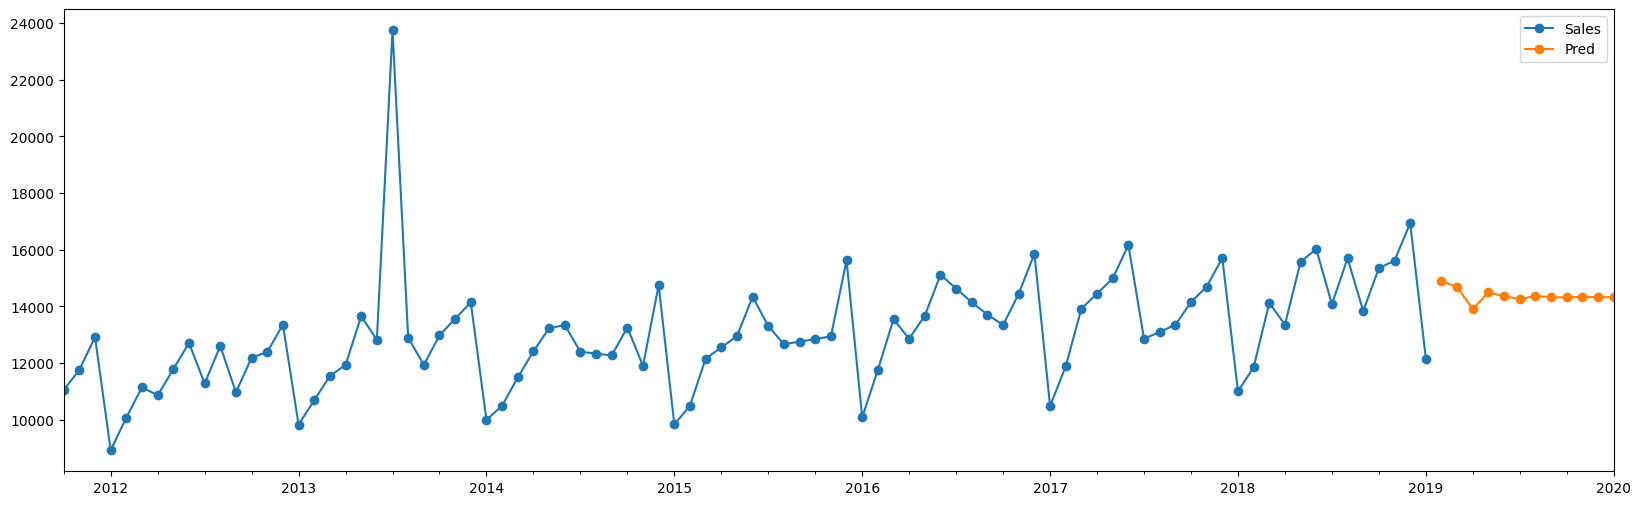

In [ ]:
df['Pred'] = pred

df.loc[~df['Sales'].isna(), 'Pred'] = np.nan
df.tail(100).plot(style='-o')